In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('Oil well xl.xlsx')
print(data.shape)
display(data.head())

(1797, 12)


,Date,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm),Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2013-01-01,49,70.0,13055.0,21.0,29.0,24.0,1819.0,214.0,NaN,NaN,NaN
1,2013-01-02,49,70.0,13055.0,21.0,29.0,24.0,1836.0,214.0,NaN,NaN,NaN
2,2013-01-03,49,70.0,13055.0,21.0,29.0,24.0,1788.0,214.0,NaN,NaN,NaN
3,2013-01-04,49,70.0,13055.0,21.0,29.0,24.0,1789.0,214.0,NaN,NaN,NaN
4,2013-01-05,44,70.0,11768.0,26.0,36.0,24.0,1825.0,214.0,NaN,NaN,NaN


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst = True)
data['Days'] = data['Date'] - data['Date'].iloc[0]
data['Days'] = data['Days'].dt.days + 1
display(data.head())

,Date,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm),Unnamed: 9,Unnamed: 10,Unnamed: 11,Days
0,2013-01-01,49,70.0,13055.0,21.0,29.0,24.0,1819.0,214.0,NaN,NaN,NaN,1.0
1,2013-01-02,49,70.0,13055.0,21.0,29.0,24.0,1836.0,214.0,NaN,NaN,NaN,2.0
2,2013-01-03,49,70.0,13055.0,21.0,29.0,24.0,1788.0,214.0,NaN,NaN,NaN,3.0
3,2013-01-04,49,70.0,13055.0,21.0,29.0,24.0,1789.0,214.0,NaN,NaN,NaN,4.0
4,2013-01-05,44,70.0,11768.0,26.0,36.0,24.0,1825.0,214.0,NaN,NaN,NaN,5.0


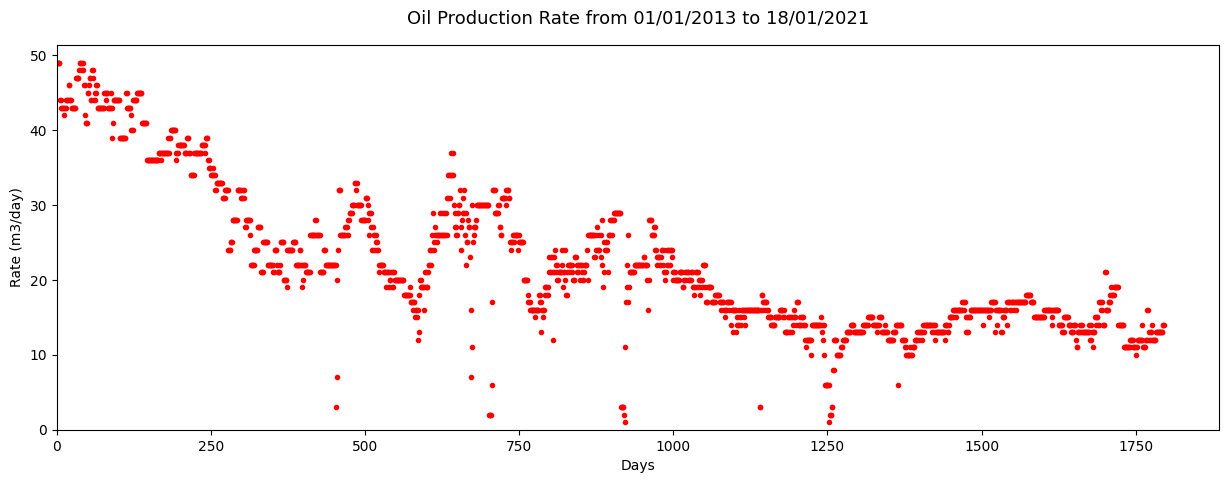

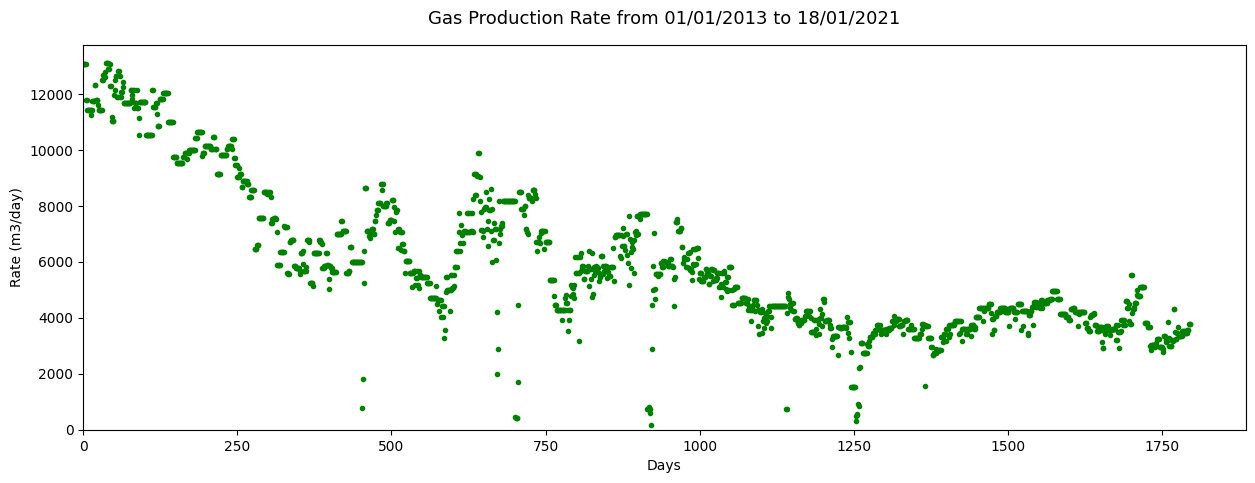

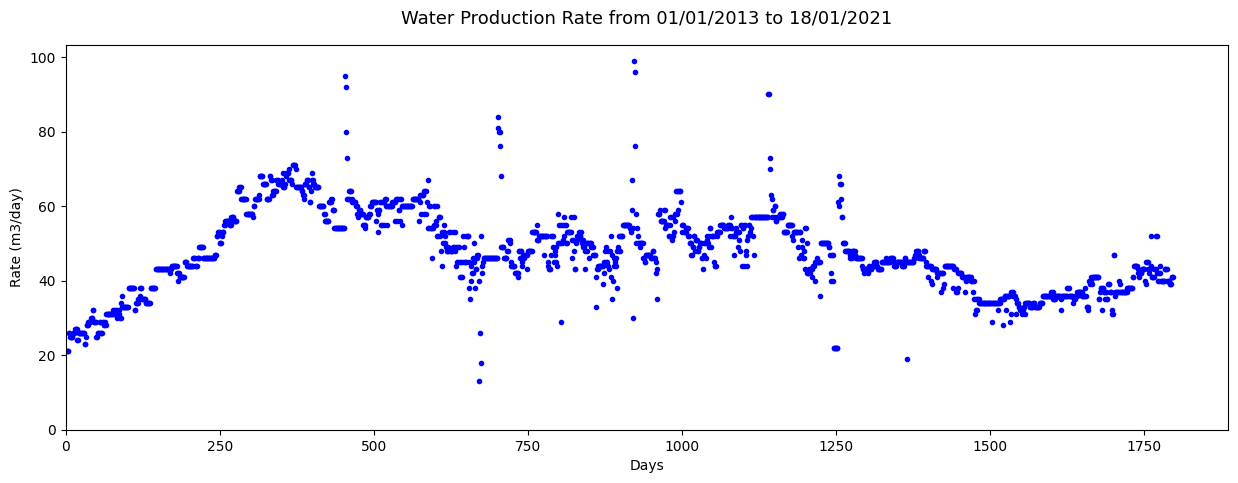

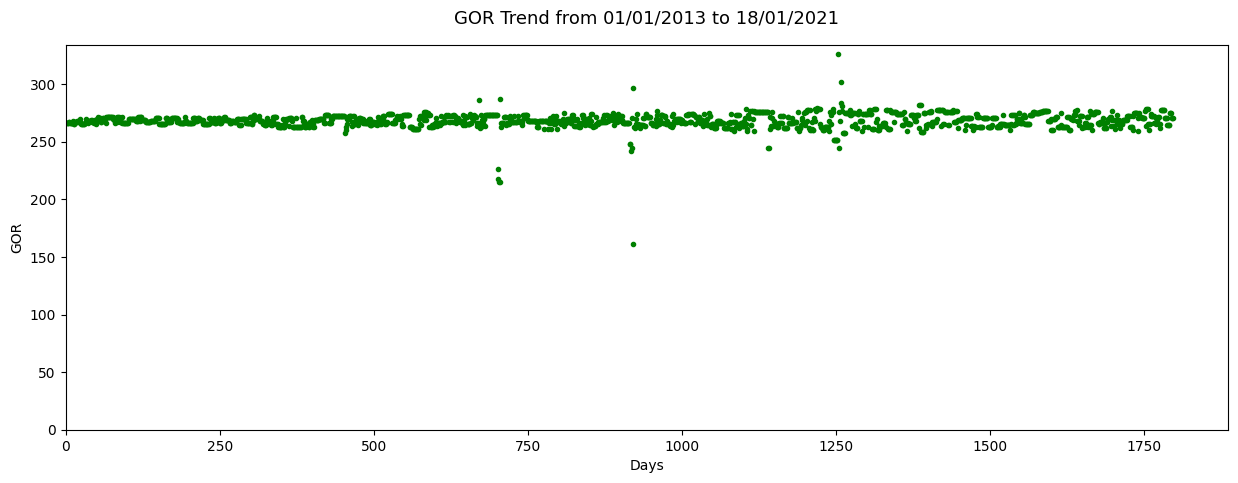

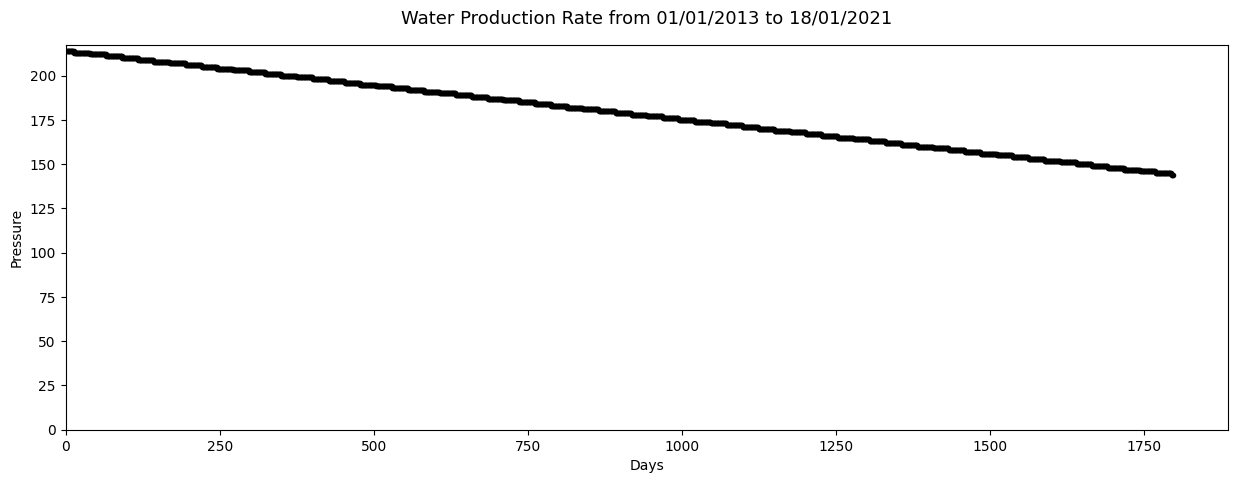

In [ ]:
Oil_rate = data['Oil volume (m3/day)']
Gas_rate = data['Gas volume (m3/day)']
Days = data['Days']
Water_rate = data['Water volume (m3/day)']

plt.figure(figsize=(15, 5))
plt.plot(Days, Oil_rate, '.', color='red')
plt.title('Oil Production Rate from 01/01/2013 to 18/01/2021', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (m3/day)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.figure(figsize=(15, 5))
plt.plot(Days, Gas_rate, '.', color='green')
plt.title('Gas Production Rate from 01/01/2013 to 18/01/2021', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (m3/day)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.figure(figsize=(15, 5))
plt.plot(Days, Water_rate, '.', color='blue')
plt.title('Water Production Rate from 01/01/2013 to 18/01/2021', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (m3/day)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.figure(figsize=(15, 5))
plt.plot(Days, Gas_rate/Oil_rate, '.', color='green')
plt.title('GOR Trend from 01/01/2013 to 18/01/2021', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('GOR')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.figure(figsize=(15, 5))
plt.plot(Days, data['Reservoir pressure (atm)'], '.', color='black')
plt.title('Water Production Rate from 01/01/2013 to 18/01/2021', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Pressure')
plt.xlim(xmin=0); plt.ylim(ymin=0)


plt.show()

In some places, we observe **peaks** in the oil and gas production which **follow the same trend for both**, but not in the water production. GOR is nearly constant with time. Also, reservoir pressure declines steadily with time, indicating **no pressure maintenance** operations, be it manual (external injection support) or natural (gas cap expansion or natural water drive).
Thus, it is likely that the **spikes occur due to change in drawdown** (Pwf and Pwh are not available for proper analysis), or due to **tweaks in lift equipment**.

In [ ]:
def decline_rate_oil(t, di, b):
  qi = Oil_rate_clean.max()
  q = qi / (np.abs((1+(b*di*t)))**(1/b))
  return q

def decline_rate_gas(t, di, b):
  qi = Gas_rate_clean.max()
  q = qi / (np.abs((1+(b*di*t)))**(1/b))
  return q

# clean the dataset
clean_data = data.dropna(subset=['Days', 'Oil volume (m3/day)', 'Gas volume (m3/day)']).copy()
Days_clean = clean_data['Days']
Oil_rate_clean = clean_data['Oil volume (m3/day)']
Gas_rate_clean = clean_data['Gas volume (m3/day)']


#last term for preventing negatives (negative di gives a curve that adapts to the positive data spikes and gives an overall worse fit)
para_oil, pcov_oil = curve_fit(decline_rate_oil, Days_clean, Oil_rate_clean, bounds=([1e-6, 1e-6], np.inf))
print("Oil decline rate = ", para_oil[0], " ; oil exponent = ", para_oil[1])

para_gas, pcov_gas = curve_fit(decline_rate_gas, Days_clean, Gas_rate_clean, bounds=([1e-6, 1e-6], np.inf))
print("Gas decline rate = ", para_gas[0], " ; gas exponent = ", para_gas[1])

Oil decline rate =  0.0022134082605307667  ; oil exponent =  1.4478804842752402
Gas decline rate =  0.002197590168818146  ; gas exponent =  1.4482124638414355


The general formula of the hyperbolic decline curve is based on the **assumption** that the well is producing under **pseudo steady state regime** (boundary dominated flow), which occurs in the **later stages of well production**. However, lack of solution gas drive and near constant GOR may indicate that the **well is still in its early stages**, hence it might have a **transient flow regime**. This could be a possible reason as to why the **exponent value comes out to be greater than one**.

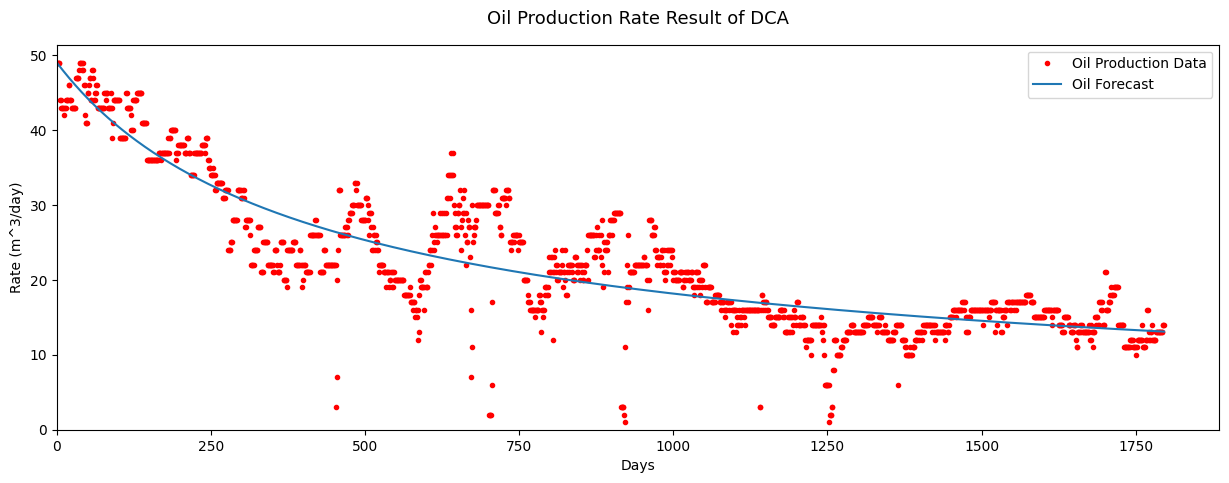

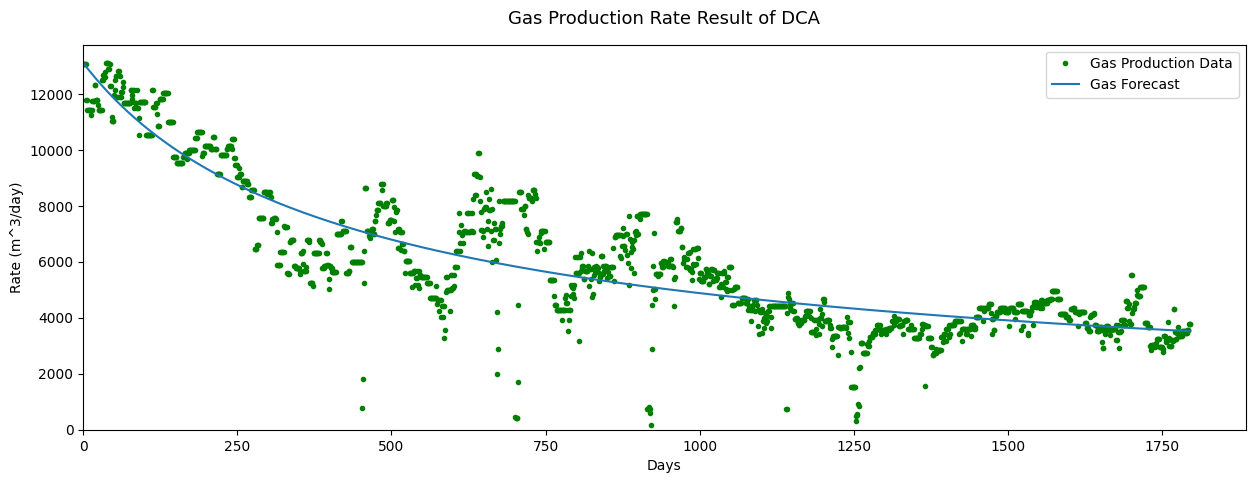

In [ ]:
Oil_rate_fit = decline_rate_oil(Days_clean, para_oil[0], para_oil[1])


plt.figure(figsize=(15,5))
plt.plot(Days_clean, Oil_rate_clean, '.', color='red', label='Oil Production Data')
plt.plot(Days_clean, Oil_rate_fit, label='Oil Forecast')
plt.title('Oil Production Rate Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (m^3/day)')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.legend()


Gas_rate_fit = decline_rate_gas(Days_clean, para_gas[0], para_gas[1])


plt.figure(figsize=(15,5))
plt.plot(Days_clean, Gas_rate_clean, '.', color='green', label='Gas Production Data')
plt.plot(Days_clean, Gas_rate_fit, label='Gas Forecast')
plt.title('Gas Production Rate Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (m^3/day)')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.legend()

plt.show()

Cumulative predicted oil production:  39824.356753097265 m^3
Cumulative predicted gas production:  10689559.659483392 m^3


(0.0, 11223382.711593315)

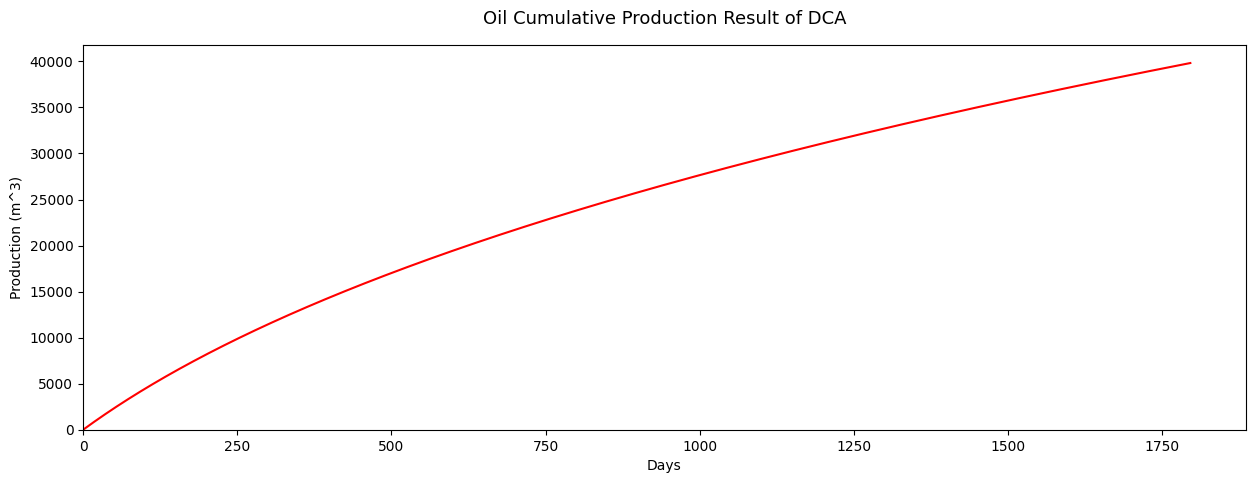

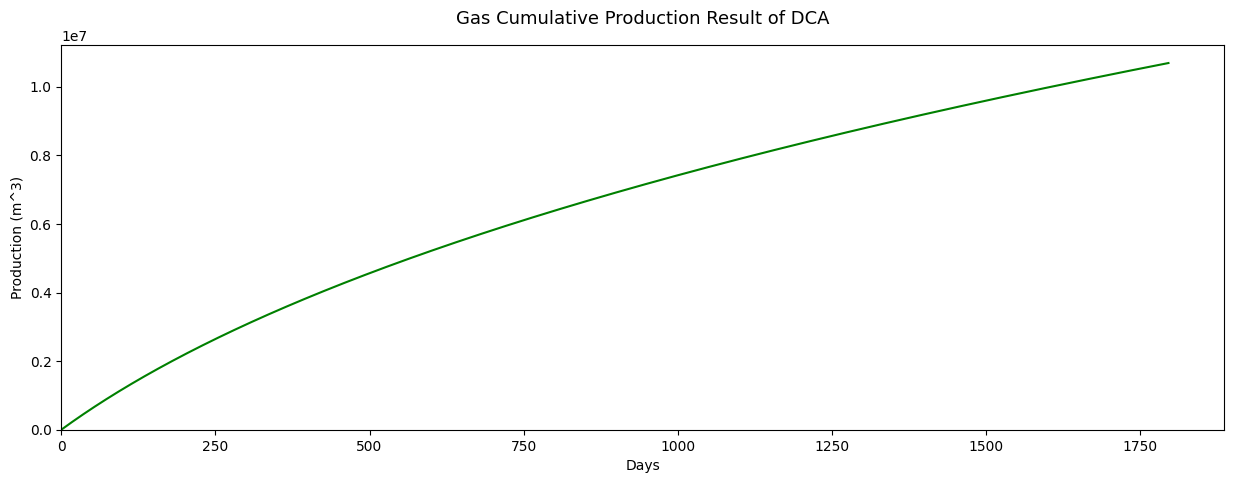

In [ ]:
#now cumulative production
def cumpro(q_forecast, qi, di, b):
  return (((qi**b) / ((1 - b) * di)) * ((qi ** (1 - b)) - (q_forecast ** (1 - b))))

oil_cumpro = cumpro(Oil_rate_fit, Oil_rate_clean.max(), para_oil[0], para_oil[1])
gas_cumpro = cumpro(Gas_rate_fit, Gas_rate_clean.max(), para_gas[0], para_gas[1])

final_oil_pred = oil_cumpro.iloc[-1]
final_gas_pred = gas_cumpro.iloc[-1]
print("Cumulative predicted oil production: ", final_oil_pred, "m^3")
print("Cumulative predicted gas production: ", final_gas_pred, "m^3")

plt.figure(figsize=(15,5))
plt.plot(Days_clean, oil_cumpro, color='red')
plt.title('Oil Cumulative Production Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Production (m^3)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.figure(figsize=(15,5))
plt.plot(Days_clean, gas_cumpro, color= 'green')
plt.title('Gas Cumulative Production Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Production (m^3)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

Cumulative actual oil production:  39811 m^3
Cumulative actual gas production:  10687036.0 m^3


(0.0, 11220735.05)

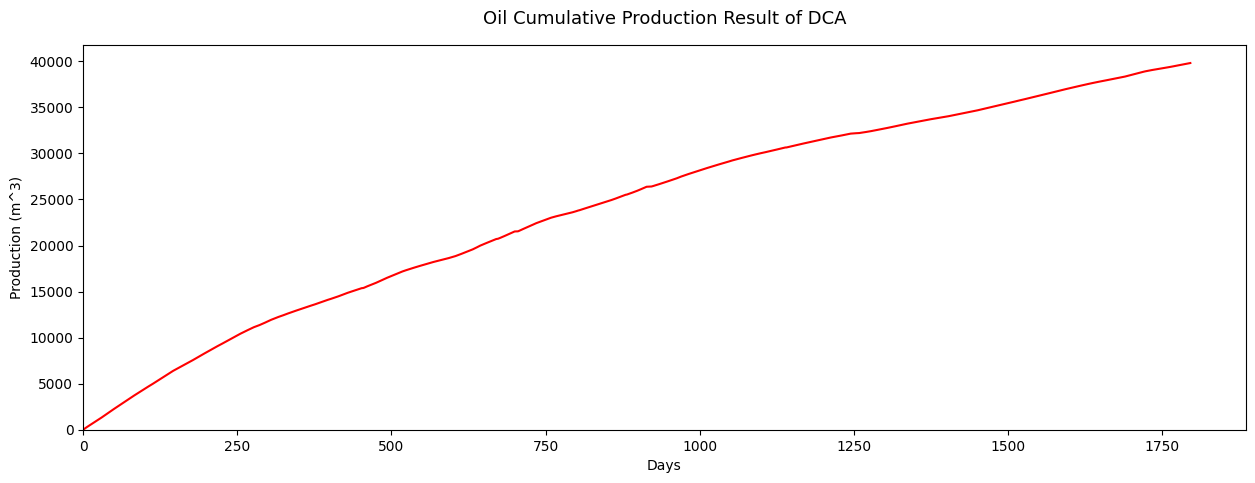

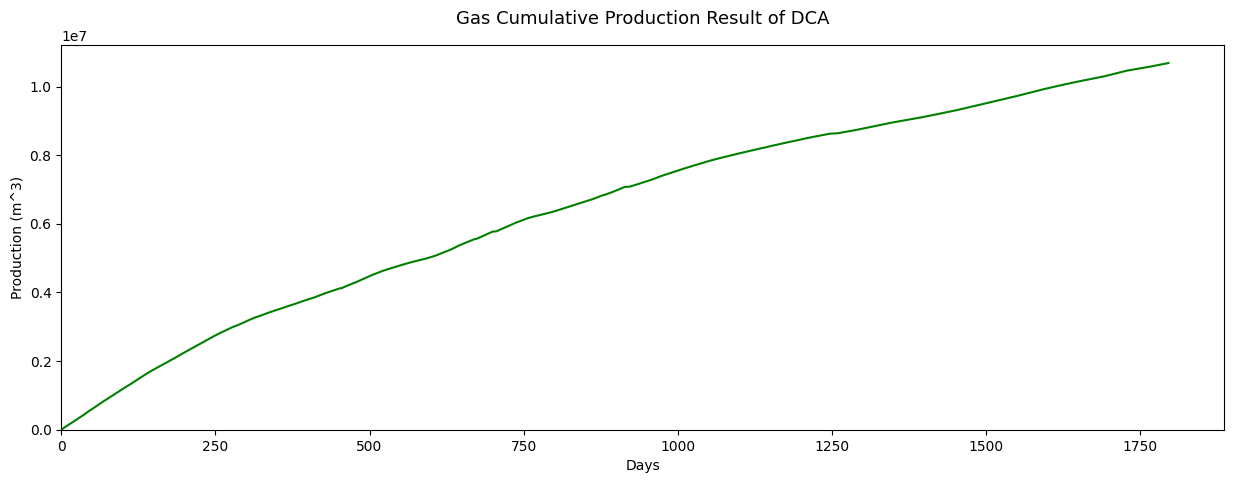

In [ ]:
cumsum_oil = Oil_rate_clean.cumsum()
cumsum_gas = Gas_rate_clean.cumsum()

final_oil_real = cumsum_oil.iloc[-1]
final_gas_real = cumsum_gas.iloc[-1]
print("Cumulative actual oil production: ", final_oil_real, "m^3")
print("Cumulative actual gas production: ", final_gas_real, "m^3")

plt.figure(figsize=(15,5))
plt.plot(Days_clean, cumsum_oil, color='red')
plt.title('Oil Cumulative Production Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Production (m^3)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.figure(figsize=(15,5))
plt.plot(Days_clean, cumsum_gas, color= 'green')
plt.title('Gas Cumulative Production Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Production (m^3)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

In [ ]:
oil_diff = final_oil_pred - final_oil_real
gas_diff = final_gas_pred - final_gas_real
print("Difference in oil production: ", oil_diff, "m^3")
print("Difference in gas production: ", gas_diff, "m^3")
print("\nPercentage difference in oil production: ", (oil_diff/final_oil_real)*100, "%")
print("Percentage difference in gas production: ", (gas_diff/final_gas_real)*100, "%")

Difference in oil production:  13.356753097265027 m^3
Difference in gas production:  2523.6594833917916 m^3

Percentage difference in oil production:  0.03355040842296106 %
Percentage difference in gas production:  0.023614213364601667 %


In [ ]:
#Now to predict future performance
Days_clean.shape

(1795,)

Cumulative oil production after another year is 44332.190773114235
Cumulative gas production after another year is 11901293.57486375


(0.0, 12496358.253606938)

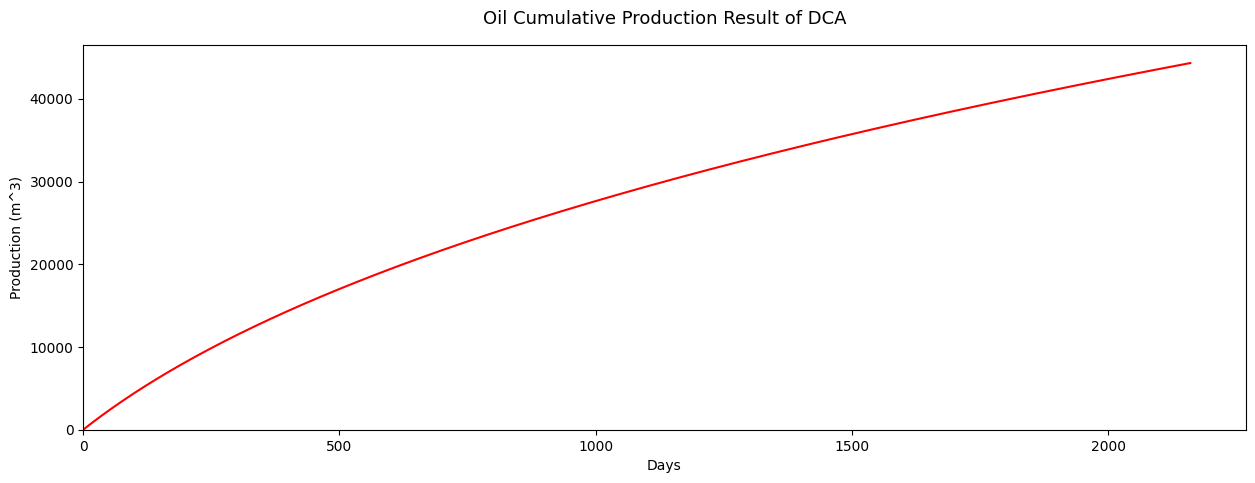

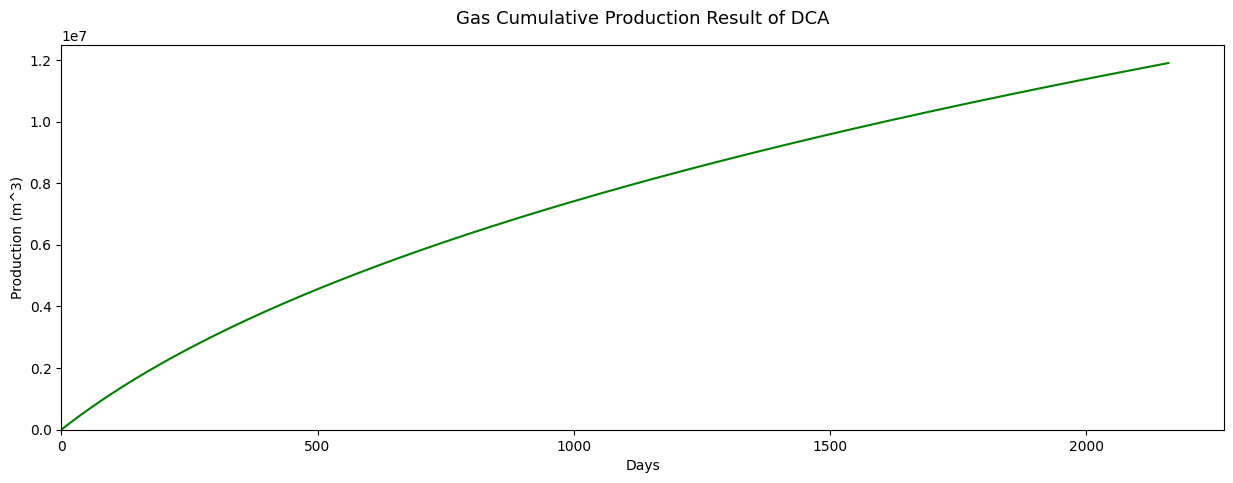

In [ ]:
days_forecast = np.arange(0, 1795+366, 1)
oil_rate_1yr = decline_rate_oil(days_forecast, para_oil[0], para_oil[1])
oil_cum_1yr = cumpro(oil_rate_1yr, Oil_rate_clean.max(), para_oil[0], para_oil[1])

gas_rate_1yr = decline_rate_gas(days_forecast, para_gas[0], para_gas[1])
gas_cum_1yr = cumpro(gas_rate_1yr, Gas_rate_clean.max(), para_gas[0], para_gas[1])

print(f"Cumulative oil production after another year is {oil_cum_1yr[-1]}")
print(f"Cumulative gas production after another year is {gas_cum_1yr[-1]}")

plt.figure(figsize=(15,5))
plt.plot(days_forecast, oil_cum_1yr, color='red')
plt.title('Oil Cumulative Production Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Production (m^3)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.figure(figsize=(15,5))
plt.plot(days_forecast, gas_cum_1yr, color= 'green')
plt.title('Gas Cumulative Production Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Production (m^3)')
plt.xlim(xmin=0); plt.ylim(ymin=0)